#**ANEXO CODIGO FUENTE APLICANDO ROTACIÓN HORIZONTAL**

In [ ]:
#Preparación del entorno

import tensorflow.keras as keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import requests
from io import StringIO
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.combine import SMOTETomek
from sklearn.pipeline import Pipeline

# Obtención y Analisis exploratorio de Datos

In [ ]:
drive.mount('/content/drive')
path = "/content/drive/My Drive/TFM/Data/fer2013.csv"
df_data = pd.read_csv(path)
df_data.head(20)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...
9,2,255 254 255 254 254 179 122 107 95 124 149 150...


In [ ]:
#Validando existencia de valores nulos                          
missing_data = df_data.isnull()
missing_data.sum(axis=0)

emotion    0
pixels     0
dtype: int64

In [ ]:
#Visualizando detalles estadisticos de variables 
df_data.describe()

,emotion
count,35887.000000
mean,3.323265
std,1.873819
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,6.000000


In [ ]:
#Visualizando detalles estadisticos incluyendo variables categoricas
df_data.describe(include="object")

,pixels
count,35887
unique,34034
top,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
freq,12


In [ ]:
#Visualizando variables
df_data.dtypes

emotion     int64
pixels     object
dtype: object

# Preparando los datos

In [ ]:
#Creando arrays de datos

y = []
X = []

data_image = df_data.pixels

for item in data_image.str.split():
    X.append(item)

X = np.array(X)
y = np.array(df_data.emotion)


#Visualizando el dataset

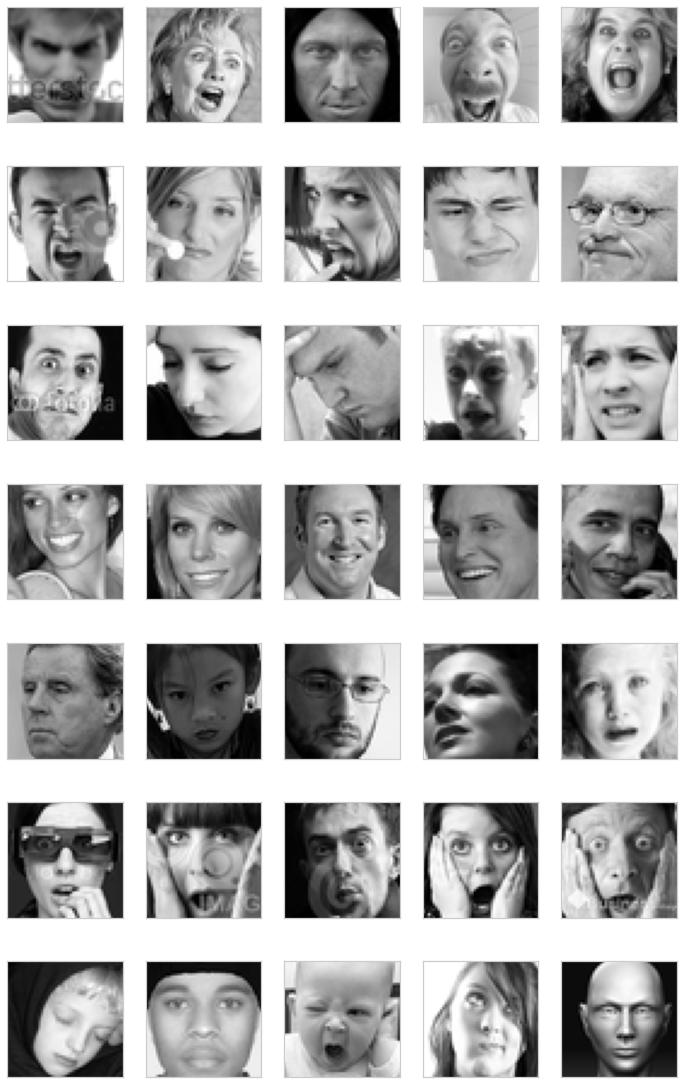

In [ ]:
#Se obtiene 5 muestras aleatorias de cada una de las expresiones del conjunto de datos

eno = df_data[(df_data['emotion'] == 0)].sample(5)
asc = df_data[(df_data['emotion'] == 1)].sample(5)
sus = df_data[(df_data['emotion'] == 2)].sample(5)
fel = df_data[(df_data['emotion'] == 3)].sample(5)
tri = df_data[(df_data['emotion'] == 4)].sample(5)
sor = df_data[(df_data['emotion'] == 5)].sample(5)
neu = df_data[(df_data['emotion'] == 6)].sample(5)

#Se crea un dataframe general con las 5 muestras aleatorias anteriores
df_emotions = pd.concat([eno, asc, sus, fel, tri, sor, neu])

emotions_arr = []

for item in df_emotions.pixels.str.split():
    emotions_arr.append(item)

emotions_arr = np.array(emotions_arr)
emotions_arr = emotions_arr.reshape(emotions_arr.shape[0],48, 48, 1)
emotions_type = emotions_arr.astype('float32')
    
n=35
plt.figure(figsize=(12, 20))
for i in range(n):
    ax = plt.subplot(7, 5, i+1)
    plt.imshow(emotions_type[i].reshape(48, 48))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
#Definiendo la cantidad de emociones por etiquetas

df_general = pd.DataFrame(columns=["emotion"])
df_general["emotion"] = y

list_emotions = df_general.emotion.value_counts(sort=False).reset_index()
list_emotions.columns = ['emotion', 'quantity']
list_emotions = list_emotions.replace({0: "Enojo", 1: "Asco", 2: "Susto", 3: "Felicidad", 4: "Tristeza", 5: "Sorpresa", 6: "Neutral"})
list_emotions

,emotion,quantity
0,Enojo,4953
1,Asco,547
2,Susto,5121
3,Felicidad,8989
4,Tristeza,6077
5,Sorpresa,4002
6,Neutral,6198


# Grafica de distribución de emociones general

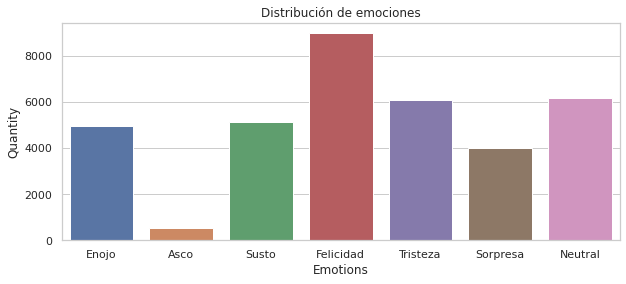

In [ ]:
plt.figure(figsize=(10,4))
sns.set_theme(style="whitegrid")
sns.barplot(x="emotion", y="quantity", data=list_emotions)
plt.title('Distribución de emociones')
plt.ylabel('Quantity', fontsize=12)
plt.xlabel('Emotions', fontsize=12)
plt.show()

#Procesado de Datos

In [ ]:
#Obteniedo datos de entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Datos de entrenamiento de entrada: {}".format(X_train.shape))
print("Datos de validación de entrada: {}".format(X_test.shape))
print("Datos de entrenamiento de salida: {}".format(y_train.shape))
print("Datos de validación de salida: {}".format(y_test.shape))



Datos de entrenamiento de entrada: (28709, 2304)
Datos de validación de entrada: (7178, 2304)
Datos de entrenamiento de salida: (28709,)
Datos de validación de salida: (7178,)


In [ ]:
#Redimensionando arrays

X_train = X_train.reshape(X_train.shape[0],48, 48, 1)
X_test = X_test.reshape(X_test.shape[0],48, 48, 1)

#Aumentado datos con rotación horizontal

X_train = np.concatenate((X_train,np.flip(X_train,2)), axis=0)
y_train = np.concatenate((y_train,y_train), axis=0)

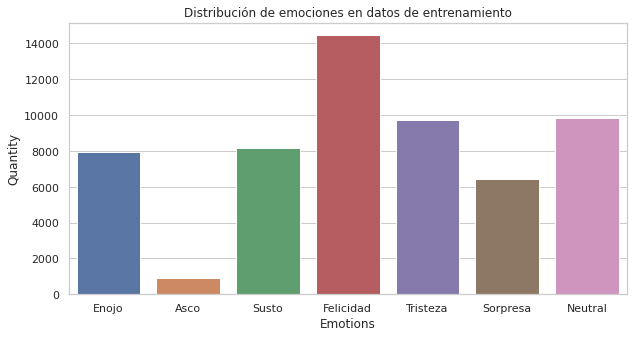

Cantidad de datos por etiquetas en Datos de entrenamiento

     emotion  quantity
0      Enojo      7936
1       Asco       890
2      Susto      8156
3  Felicidad     14448
4   Tristeza      9734
5   Sorpresa      6414
6    Neutral      9840



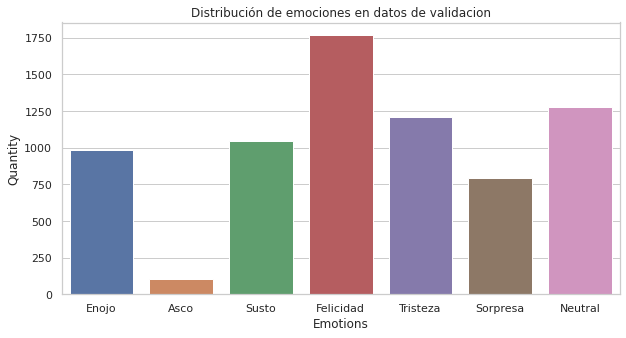

Cantidad de datos por etiquetas en Datos de validación

     emotion  quantity
0      Enojo       985
2       Asco       102
4      Susto      1043
6  Felicidad      1765
1   Tristeza      1210
3   Sorpresa       795
5    Neutral      1278



In [ ]:
#Distribución de emociones en datos de entrenamiento y validación

emotion_labels = ['Enojo', 'Asco', 'Susto', 'Felicidad', 'Tristeza', 'Sorpresa', 'Neutral']



def addDataFrame(df, tit):
    plt.figure(figsize=(10, 5))
    lists = df.emotion.value_counts(sort=False).reset_index()
    lists.columns = ['emotion', 'quantity']
    lists = lists.sort_values('emotion')
    lists = lists.replace({0: "Enojo", 1: "Asco", 2: "Susto", 3: "Felicidad", 4: "Tristeza", 5: "Sorpresa", 6: "Neutral"})
    
    # df = df.emotion.reset_index()
    # df = df.emotion.value_counts(sort=False).plot(ax=axe, kind='bar', rot=0)
    # axe.set_xticklabels(emotion_labels)
    # axe.set_xlabel("Emotions")
    # axe.set_ylabel("Quantity")
    # axe.set_title(tit)
    sns.barplot(x="emotion", y="quantity", data=lists)
    plt.title(tit)
    plt.ylabel('Quantity', fontsize=12)
    plt.xlabel('Emotions', fontsize=12)
    plt.show()
    return lists

df_train = pd.DataFrame(columns=["emotion"])
df_train["emotion"] = y_train
res_train = addDataFrame(df_train, "Distribución de emociones en datos de entrenamiento")

print("Cantidad de datos por etiquetas en Datos de entrenamiento\n")
print(res_train)
print("")

df_test = pd.DataFrame(columns=["emotion"])
df_test["emotion"] = y_test
res_test = addDataFrame(df_test, "Distribución de emociones en datos de validacion")

print("Cantidad de datos por etiquetas en Datos de validación\n")
print(res_test)
print("")



In [ ]:
#Normalizando imagenes y codificando a etiqueta onehot
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#Normalizando Imagenes
mean = X_train.mean(axis=0)
X_train = X_train - mean
std = X_train.std(axis=0)
X_train = X_train/std

X_test = X_test - mean
X_test = X_test / std



#Se cambia a codificación a onehot
n_clases = 7
y_train_onehot = keras.utils.to_categorical(y_train, n_clases )
y_test_onehot = keras.utils.to_categorical( y_test, n_clases )

In [ ]:
y_train.shape

(57418,)

# Construcción del modelo de la red neuronal convolucional

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), input_shape=(48, 48, 1), activation='relu'))

model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(7, activation='softmax'))

#Se define el algoritmo de entrenamiento y se compila el modelo
sgd = keras.optimizers.SGD(lr=0.028)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 23, 23, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 11, 11, 128)      

# Entrenamiento del Modelo

In [ ]:
res = model.fit(X_train, y_train_onehot, epochs=25, validation_data = (X_test, y_test_onehot), batch_size=64)

Epoch 1/25
898/898 [==============================] - 11s 12ms/step - loss: 1.6870 - accuracy: 0.3291 - val_loss: 1.6039 - val_accuracy: 0.3827
Epoch 2/25
898/898 [==============================] - 10s 12ms/step - loss: 1.5235 - accuracy: 0.4124 - val_loss: 1.4516 - val_accuracy: 0.4432
Epoch 3/25
898/898 [==============================] - 10s 11ms/step - loss: 1.4023 - accuracy: 0.4646 - val_loss: 1.3390 - val_accuracy: 0.4921
Epoch 4/25
898/898 [==============================] - 10s 11ms/step - loss: 1.3120 - accuracy: 0.5001 - val_loss: 1.2827 - val_accuracy: 0.5086
Epoch 5/25
898/898 [==============================] - 10s 12ms/step - loss: 1.2445 - accuracy: 0.5257 - val_loss: 1.2210 - val_accuracy: 0.5407
Epoch 6/25
898/898 [==============================] - 10s 12ms/step - loss: 1.1903 - accuracy: 0.5489 - val_loss: 1.2133 - val_accuracy: 0.5361
Epoch 7/25
898/898 [==============================] - 10s 12ms/step - loss: 1.1466 - accuracy: 0.5655 - val_loss: 1.1503 - val_accuracy:

# Evaluación del Modelo

In [ ]:
scores = model.evaluate(X_test, y_test_onehot, verbose=0)
print("Precision del Modelo: %.2f%%" % (scores[1]*100))

Precision del Modelo: 62.97%


# Matriz de Confusión

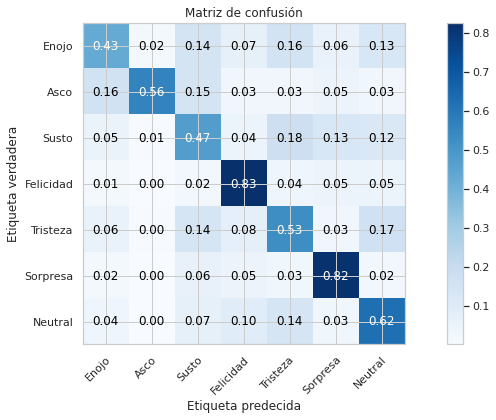

In [ ]:

X_test_2 = np.asarray(X_test, dtype="float32")
X_test_2 = X_test_2.reshape(X_test_2.shape[0],48, 48, 1)

label_true = np.argmax(y_test_onehot, axis=1)
label_pred = np.argmax(model.predict(X_test_2), axis=1)

conf_m = confusion_matrix(label_true, label_pred)
conf_m = conf_m.astype('float') / conf_m.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(12,6))
im = ax.imshow(conf_m, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

ax.set(xticks=np.arange(conf_m.shape[1]),
           yticks=np.arange(conf_m.shape[0]),
           xticklabels=emotion_labels, yticklabels=emotion_labels,
           title="Matriz de confusión",
           ylabel='Etiqueta verdadera',
           xlabel='Etiqueta predecida')

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

fmt = '.2f'
thresh = conf_m.max() / 2.
for i in range(conf_m.shape[0]):
    for j in range(conf_m.shape[1]):
        ax.text(j, i, format(conf_m[i, j], fmt),
                ha="center", va="center",
                color="white" if conf_m[i, j] > thresh else "black")
fig.tight_layout()

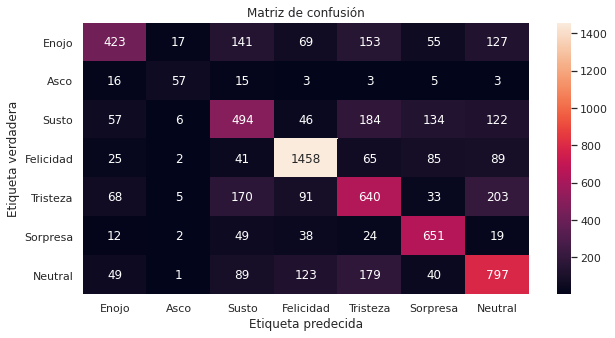

              precision    recall  f1-score   support

           0       0.65      0.43      0.52       985
           1       0.63      0.56      0.59       102
           2       0.49      0.47      0.48      1043
           3       0.80      0.83      0.81      1765
           4       0.51      0.53      0.52      1210
           5       0.65      0.82      0.72       795
           6       0.59      0.62      0.60      1278

    accuracy                           0.63      7178
   macro avg       0.62      0.61      0.61      7178
weighted avg       0.63      0.63      0.62      7178



In [ ]:
conf_matrix = confusion_matrix(label_true, label_pred)
plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix, xticklabels=emotion_labels, yticklabels=emotion_labels, annot=True, fmt="d");
plt.title("Matriz de confusión")
plt.ylabel('Etiqueta verdadera')
plt.xlabel('Etiqueta predecida')
plt.show()
print (classification_report(label_true, label_pred))

# Gráficas de Precisión y perdida

In [ ]:
def graph_images(var, val, title, xlabel, ylabel):
  
    plt.plot(var)
    plt.plot(val)
    plt.title(title)
    plt.ylabel(xlabel)
    plt.xlabel(ylabel)
    plt.legend(['Training', 'test'], loc='upper left')
    plt.show()

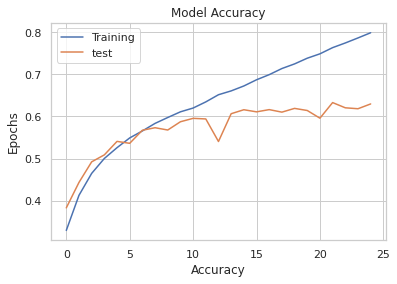

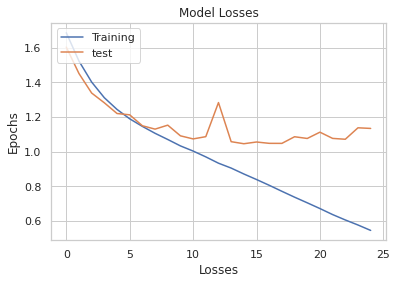

In [ ]:
##### Imagen de precisión
var = res.history['accuracy']
val = res.history['val_accuracy']
title = "Model Accuracy"
ylabel = "Accuracy"
xlabel = "Epochs"

graph_images(var, val, title, xlabel, ylabel)

##### Imagen de perdidas
var = res.history['loss']
val = res.history['val_loss']
title = "Model Losses"
ylabel = "Losses"
xlabel = "Epochs"

graph_images(var, val, title, xlabel, ylabel)

# Predicción del Modelo

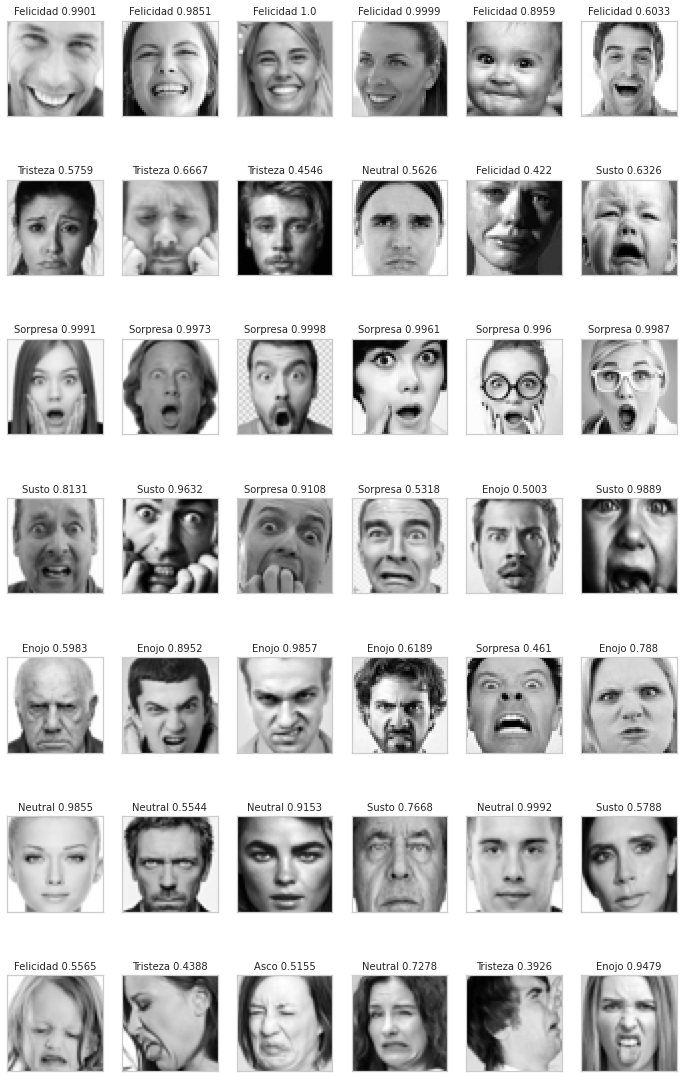

In [ ]:
image_reshape = []
label = []

def image_process(ima):

    from PIL import Image, ImageOps
    global image_reshape, label

    img = Image.open(ima)
    img = ImageOps.grayscale(img)
    img = ImageOps.fit(img, (48, 48))
    expresion = np.asarray(img, dtype="float32")
    expresion = expresion.reshape(1, 48, 48, 1)

    expresion = expresion - mean
    expresion = expresion / std

    # plt.imshow(img)
    # plt.show()

    pred = model.predict(expresion)
    
    image_reshape.append(img)
    label.append(str(emotion_labels[np.argmax(pred)]) + " " + str(round(pred.max(), 4)))
    # print(label, emotions[np.argmax(pred)], pred.max())
    # print("===============================================================")
    # print("===============================================================")
    # print(" ")


image_process("/content/drive/My Drive/TFM/Images/happy1.jpg")
image_process("/content/drive/My Drive/TFM/Images/happy2.jpg")
image_process("/content/drive/My Drive/TFM/Images/happy3.jpg")
image_process("/content/drive/My Drive/TFM/Images/happy4.jpg")
image_process("/content/drive/My Drive/TFM/Images/happy5.jpg")
image_process("/content/drive/My Drive/TFM/Images/happy6.jpg")

image_process("/content/drive/My Drive/TFM/Images/sad1.jpg")
image_process("/content/drive/My Drive/TFM/Images/sad2.jpg")
image_process("/content/drive/My Drive/TFM/Images/sad3.jpg")
image_process("/content/drive/My Drive/TFM/Images/sad4.jpg")
image_process("/content/drive/My Drive/TFM/Images/sad5.jpg")
image_process("/content/drive/My Drive/TFM/Images/sad6.jpg")

image_process("/content/drive/My Drive/TFM/Images/surprise1.jpg")
image_process("/content/drive/My Drive/TFM/Images/surprise2.jpg")
image_process("/content/drive/My Drive/TFM/Images/surprise3.jpg")
image_process("/content/drive/My Drive/TFM/Images/surprise4.jpg")
image_process("/content/drive/My Drive/TFM/Images/surprise5.jpg")
image_process("/content/drive/My Drive/TFM/Images/surprise6.jpg")

image_process("/content/drive/My Drive/TFM/Images/fear1.jpg")
image_process("/content/drive/My Drive/TFM/Images/fear2.jpg")
image_process("/content/drive/My Drive/TFM/Images/fear3.jpg")
image_process("/content/drive/My Drive/TFM/Images/fear4.jpg")
image_process("/content/drive/My Drive/TFM/Images/fear5.jpg")
image_process("/content/drive/My Drive/TFM/Images/fear6.jpg")

image_process("/content/drive/My Drive/TFM/Images/angry1.jpg")
image_process("/content/drive/My Drive/TFM/Images/angry2.jpg")
image_process("/content/drive/My Drive/TFM/Images/angry3.jpg")
image_process("/content/drive/My Drive/TFM/Images/angry4.jpg")
image_process("/content/drive/My Drive/TFM/Images/angry5.jpg")
image_process("/content/drive/My Drive/TFM/Images/angry6.jpg")

image_process("/content/drive/My Drive/TFM/Images/neutral1.jpg")
image_process("/content/drive/My Drive/TFM/Images/neutral2.jpg")
image_process("/content/drive/My Drive/TFM/Images/neutral3.jpg")
image_process("/content/drive/My Drive/TFM/Images/neutral4.jpg")
image_process("/content/drive/My Drive/TFM/Images/neutral5.jpg")
image_process("/content/drive/My Drive/TFM/Images/neutral6.jpg")

image_process("/content/drive/My Drive/TFM/Images/disgust1.jpg")
image_process("/content/drive/My Drive/TFM/Images/disgust2.jpg")
image_process("/content/drive/My Drive/TFM/Images/disgust3.jpg")
image_process("/content/drive/My Drive/TFM/Images/disgust4.jpg")
image_process("/content/drive/My Drive/TFM/Images/disgust5.jpg")
image_process("/content/drive/My Drive/TFM/Images/disgust6.jpg")

n = len(image_reshape)

plt.figure(figsize=(12, 20))
for i in range(n):
    ax = plt.subplot(7, 6, i+1)
    plt.imshow(image_reshape[i])
    plt.title(label[i], fontsize=10)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()